# À propos de ce Dataset
Informations sur la valeur des biens immobiliers : un ensemble de données de régression pour débutants
Cet ensemble de données est conçu pour permettre aux débutants de s'entraîner à résoudre des problèmes de régression, notamment dans le cadre de la prévision des prix des logements. Il contient 1 000 lignes, chaque ligne représentant une maison et divers attributs qui influencent son prix. L'ensemble de données est parfaitement adapté à l'apprentissage des techniques de modélisation par régression de niveau élémentaire à intermédiaire.

## Caractéristiques:
**Square_Footage** : la taille de la maison en pieds carrés. Les maisons plus grandes ont généralement des prix plus élevés.

**Num_Bedrooms** : Le nombre de chambres dans la maison. Plus il y a de chambres, plus la valeur d'une maison augmente.

**Num_Bathrooms** : Le nombre de salles de bains dans la maison. Les maisons avec plus de salles de bains sont généralement plus chères.

**Année de construction** : année de construction de la maison. Les maisons plus anciennes peuvent être moins chères en raison de l'usure.

**Lot_Size** : La taille du terrain sur lequel la maison est construite, mesurée en acres. Les terrains plus grands ont tendance à ajouter de la valeur à une propriété.

**Garage_Size** : nombre de voitures pouvant entrer dans le garage. Les maisons dotées de garages plus grands sont généralement plus chères.

**Neighborhood_Quality** : évaluation de la qualité du quartier sur une échelle de 1 à 10, où 10 indique un quartier de haute qualité. Les meilleurs quartiers se traduisent généralement par des prix plus élevés.

**House_Price (variable cible)** : Le prix de la maison, qui est la variable dépendante que vous souhaitez prédire.

In [117]:

import pandas as pd
import numpy as np
file_path = r'C:\Users\Samia\Desktop\CoursNpower\Dataset2\house_price_regression_dataset.csv'  
df = pd.read_csv(file_path)

## Les premières lignes du dataframe

In [119]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


## Identifier les valeurs manquantes

In [43]:
# Vérifier s'il y a des valeurs manquantes dans chaque colonne
missing_values = df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
missing_values[missing_values > 0]


Series([], dtype: int64)

## Traitement des valeurs manquantes 
### Supprimer les lignes avec trop de valeurs manquantes

In [68]:
# Supprimer les lignes qui contiennent des valeurs manquantes
df_cleaned = df.dropna()
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Price_Normalized
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,0.151269
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,0.876606
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,0.668617
3,966,1,2,1977,2.730667,1,8,2.296989e+05,0.118474
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,0.933278
...,...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05,0.591874
996,3179,1,2,1999,2.977123,1,10,6.837232e+05,0.574042
997,2606,4,2,1962,4.055067,0,2,5.720240e+05,0.461963
998,4723,5,2,1950,1.930921,0,7,9.648653e+05,0.856141


## Correction des types de données

on verifie le type de chaque colonne

In [107]:
print(df.dtypes)

Square_Footage               int64
Num_Bedrooms                 int64
Num_Bathrooms                int64
Year_Built                   int64
Lot_Size                   float64
Garage_Size                  int64
Neighborhood_Quality      category
House_Price                float64
House_Price_Normalized     float64
Prix_par_Pied_Carré        float64
dtype: object


In [53]:
# Convertir une colonne en entier (par exemple, l'année de construction)
df['Year_Built'] = pd.to_numeric(df['Year_Built'], errors='coerce')

In [56]:
# Convertir une colonne en catégorie (par exemple, la qualité du quartier)
df['Neighborhood_Quality'] = df['Neighborhood_Quality'].astype('category')

## Suppression des valeurs aberrantes (outliers)

In [66]:
# Par exemple, supprimer les valeurs aberrantes dans la colonne 'Square_Footage'
Q1 = df['Square_Footage'].quantile(0.25)
Q3 = df['Square_Footage'].quantile(0.75)
IQR = Q3 - Q1

# Définir des limites pour détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# on a définit les bornes pour trouver les valeurs aberrantes, toute valeur en dehors de ces bornes (qui n'est pas entre lower_bound et upper_bound)
# est une valeur aberrante

# Filtrer les données pour supprimer les valeurs aberrantes
df_cleaned = df[(df['Square_Footage'] >= lower_bound) & (df['Square_Footage'] <= upper_bound)]
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Price_Normalized
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,0.151269
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,0.876606
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,0.668617
3,966,1,2,1977,2.730667,1,8,2.296989e+05,0.118474
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,0.933278
...,...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05,0.591874
996,3179,1,2,1999,2.977123,1,10,6.837232e+05,0.574042
997,2606,4,2,1962,4.055067,0,2,5.720240e+05,0.461963
998,4723,5,2,1950,1.930921,0,7,9.648653e+05,0.856141


##  Transformation des données

In [64]:
# Normaliser la colonne 'House_Price' pour que les valeurs soient entre 0 et 1
df['House_Price_Normalized'] = (df['House_Price'] - df['House_Price'].min()) / (df['House_Price'].max() - df['House_Price'].min())
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Price_Normalized
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,0.151269
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,0.876606
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,0.668617
3,966,1,2,1977,2.730667,1,8,2.296989e+05,0.118474
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,0.933278
...,...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05,0.591874
996,3179,1,2,1999,2.977123,1,10,6.837232e+05,0.574042
997,2606,4,2,1962,4.055067,0,2,5.720240e+05,0.461963
998,4723,5,2,1950,1.930921,0,7,9.648653e+05,0.856141


## Création de nouvelles colonnes

In [71]:
# Créer une nouvelle colonne 'Prix_par_Pied_Carré'
df['Prix_par_Pied_Carré'] = df['House_Price'] / df['Square_Footage']
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Price_Normalized,Prix_par_Pied_Carré
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,0.151269,192.928568
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,0.876606,230.632222
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,0.668617,216.586133
3,966,1,2,1977,2.730667,1,8,2.296989e+05,0.118474,237.783560
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,0.933278,211.478047
...,...,...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05,0.591874,215.116221
996,3179,1,2,1999,2.977123,1,10,6.837232e+05,0.574042,215.074917
997,2606,4,2,1962,4.055067,0,2,5.720240e+05,0.461963,219.502695
998,4723,5,2,1950,1.930921,0,7,9.648653e+05,0.856141,204.290768


## Vérification finale

In [76]:
# Vérifier que les transformations sont correctes
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Square_Footage          1000 non-null   int64   
 1   Num_Bedrooms            1000 non-null   int64   
 2   Num_Bathrooms           1000 non-null   int64   
 3   Year_Built              1000 non-null   int64   
 4   Lot_Size                1000 non-null   float64 
 5   Garage_Size             1000 non-null   int64   
 6   Neighborhood_Quality    1000 non-null   category
 7   House_Price             1000 non-null   float64 
 8   House_Price_Normalized  1000 non-null   float64 
 9   Prix_par_Pied_Carré     1000 non-null   float64 
dtypes: category(1), float64(4), int64(5)
memory usage: 71.8 KB


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Price_Normalized,Prix_par_Pied_Carré
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,0.151269,192.928568
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,0.876606,230.632222
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,0.668617,216.586133
3,966,1,2,1977,2.730667,1,8,2.296989e+05,0.118474,237.783560
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,0.933278,211.478047
...,...,...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05,0.591874,215.116221
996,3179,1,2,1999,2.977123,1,10,6.837232e+05,0.574042,215.074917
997,2606,4,2,1962,4.055067,0,2,5.720240e+05,0.461963,219.502695
998,4723,5,2,1950,1.930921,0,7,9.648653e+05,0.856141,204.290768


In [78]:
# Afficher un résumé statistique des données nettoyées
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,House_Price,House_Price_Normalized,Prix_par_Pied_Carré
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,6.188610e+05,0.508960,226.917962
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.535681e+05,0.254431,26.925402
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.116269e+05,0.000000,176.012388
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,4.016482e+05,0.291008,211.446222
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.282673e+05,0.518398,219.595509
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.271413e+05,0.717948,234.179240
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,1.108237e+06,1.000000,430.613354


##  Distribution des variables
Visualiser la distribution des variables permet de comprendre comment les données sont réparties 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


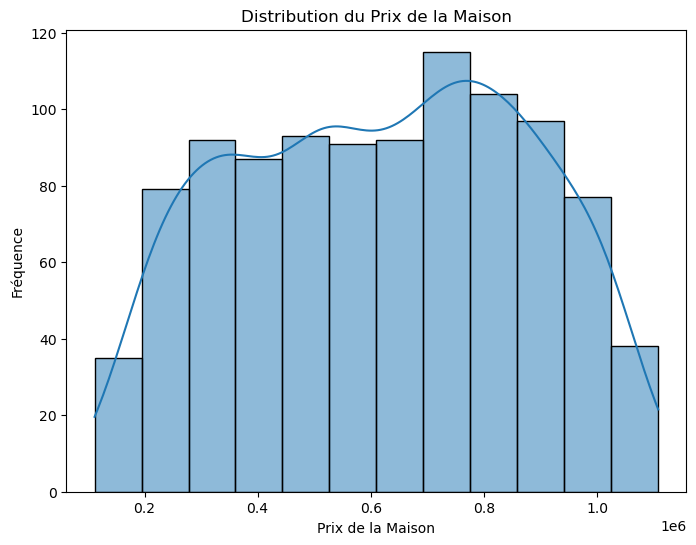

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution du prix de la maison
plt.figure(figsize=(8, 6))
sns.histplot(df['House_Price'], kde=True)
plt.title('Distribution du Prix de la Maison')
plt.xlabel('Prix de la Maison')
plt.ylabel('Fréquence')
plt.show()

## Relation entre deux variables (nuage de points)

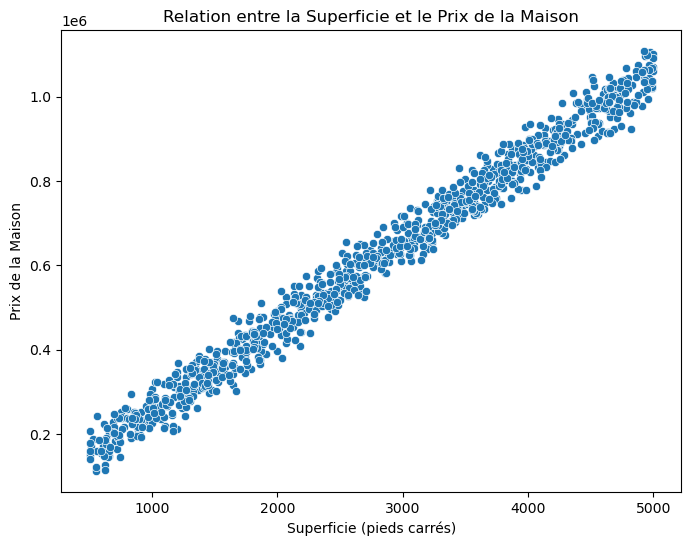

In [88]:
# Relation entre la superficie et le prix de la maison
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Square_Footage', y='House_Price', data=df)
plt.title('Relation entre la Superficie et le Prix de la Maison')
plt.xlabel('Superficie (pieds carrés)')
plt.ylabel('Prix de la Maison')
plt.show()

## Boxplot pour analyser les variables catégoriques 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


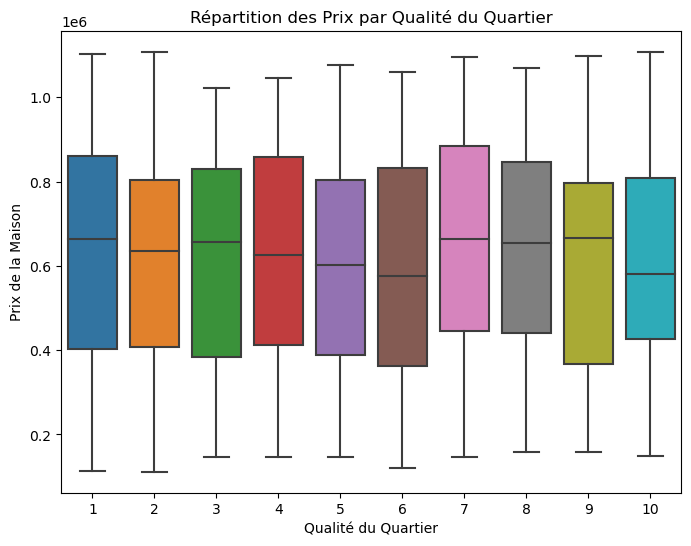

In [91]:
# Boxplot pour la qualité du quartier et le prix de la maison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Neighborhood_Quality', y='House_Price', data=df)
plt.title('Répartition des Prix par Qualité du Quartier')
plt.xlabel('Qualité du Quartier')
plt.ylabel('Prix de la Maison')
plt.show()

## Heatmap pour la corrélation entre les variables

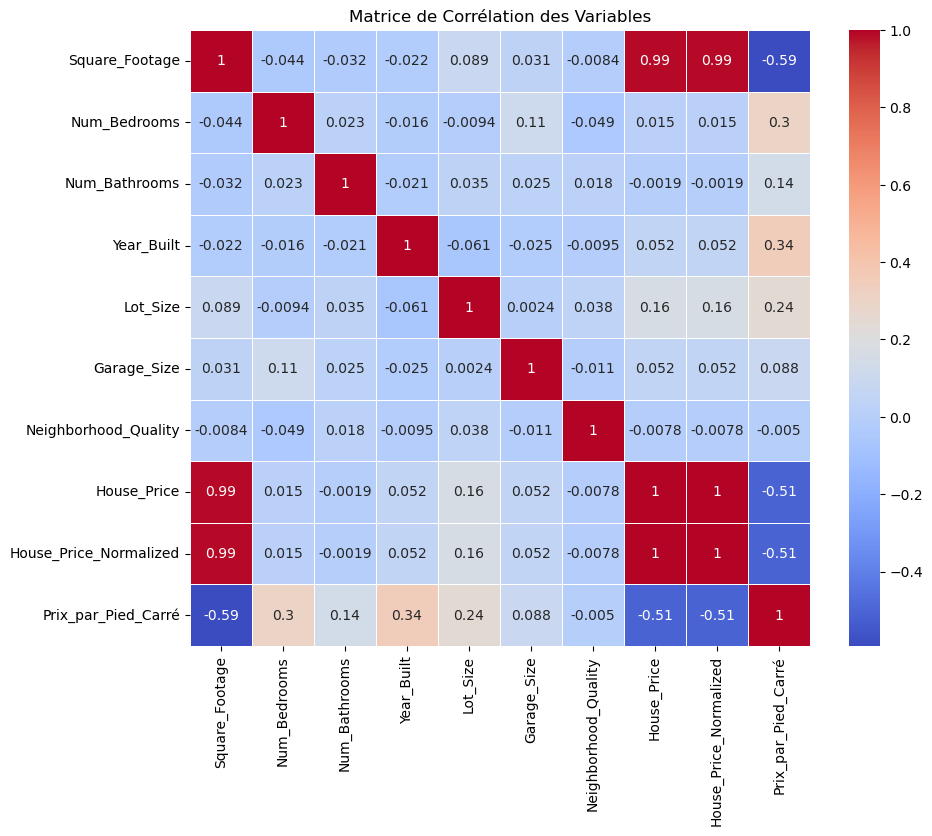

In [94]:
# Matrice de corrélation
correlation_matrix = df.corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()

## Barplot pour visualiser des moyennes ou des totaux

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


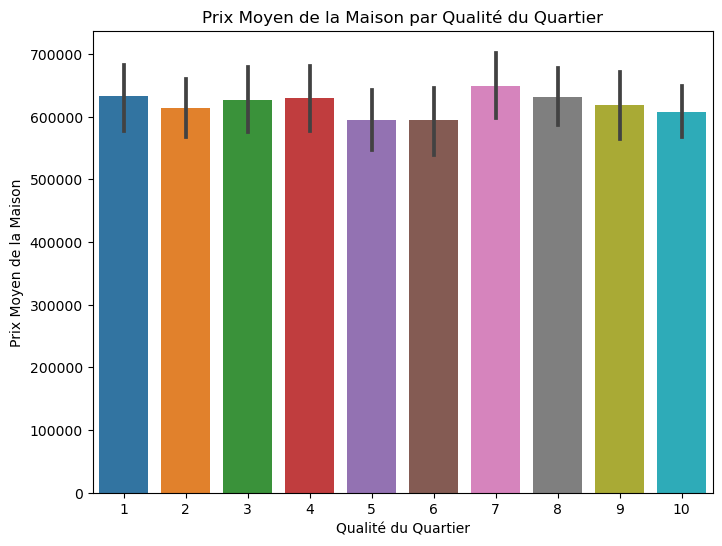

In [101]:
# Barplot pour la moyenne du prix de la maison en fonction de la qualité du quartier
plt.figure(figsize=(8, 6))
sns.barplot(x='Neighborhood_Quality', y='House_Price', data=df)
plt.title('Prix Moyen de la Maison par Qualité du Quartier')
plt.xlabel('Qualité du Quartier')
plt.ylabel('Prix Moyen de la Maison')
plt.show()

## Analyse des valeurs aberrantes
Les valeurs aberrantes peuvent être visualisées à l'aide de boxplots pour détecter les extrêmes dans les données.

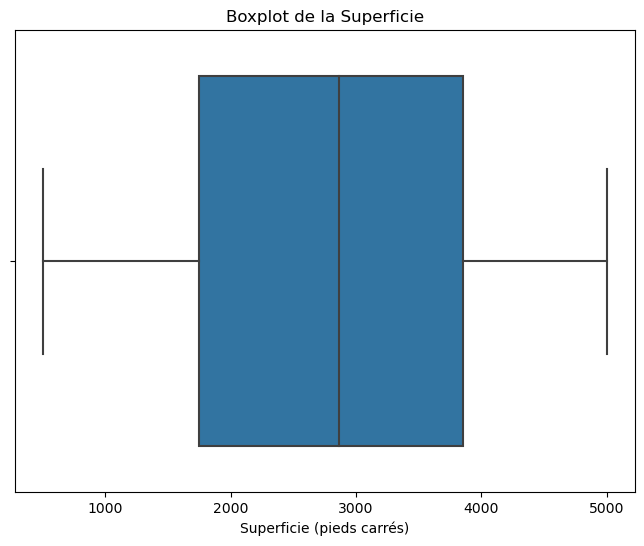

In [105]:
# Boxplot pour visualiser les valeurs aberrantes dans la superficie
plt.figure(figsize=(8, 6))
sns.boxplot(x='Square_Footage', data=df)
plt.title('Boxplot de la Superficie')
plt.xlabel('Superficie (pieds carrés)')
plt.show()